LIMPIEZA Y COMBINACION DE LAS BASES DE DATOS (PASO 1)

In [1]:
import pandas as pd

# Cargar archivos CSV
clientes = pd.read_csv('base_clientes_final.csv')
transacciones = pd.read_csv('base_transacciones_final.csv')

# Limpiar nombres de columnas por si acaso
clientes.rename(columns=lambda x: x.strip(), inplace=True)
transacciones.rename(columns=lambda x: x.strip(), inplace=True)

# Combinar las bases usando 'id',,,
base_completa = transacciones.merge(clientes, on='id', how='left')

# Llenar nulos en giro_comercio
base_completa['giro_comercio'].fillna("SIN CLASIFICAR", inplace=True)

# Vista previa
print("Vista previa de la base combinada:")
print(base_completa.head())

# Guardar base combinada
base_completa.to_csv('base_completa.csv', index=False)
print("\n¡Archivo guardado como 'base_completa.csv'!")

Vista previa de la base combinada:
                                         id       fecha comercio  \
0  91477f382c3cf63ab5cd9263b502109243741158  2022-01-02   AMAZON   
1  91477f382c3cf63ab5cd9263b502109243741158  2022-01-05    RAPPI   
2  91477f382c3cf63ab5cd9263b502109243741158  2022-01-05    RAPPI   
3  91477f382c3cf63ab5cd9263b502109243741158  2022-01-05   AMAZON   
4  91477f382c3cf63ab5cd9263b502109243741158  2022-01-05   AMAZON   

                                giro_comercio tipo_venta  monto  \
0  COMERCIOS ELECTRONICOS (VTAS POR INTERNET)    digital   5.99   
1   SERVICIOS EMPRESARIALES - NO CLASIFICADOS    digital  13.01   
2   SERVICIOS EMPRESARIALES - NO CLASIFICADOS    digital  15.84   
3  COMERCIOS ELECTRONICOS (VTAS POR INTERNET)    digital   8.17   
4  COMERCIOS ELECTRONICOS (VTAS POR INTERNET)    digital   2.54   

  fecha_nacimiento  fecha_alta  id_municipio  id_estado  \
0       1987-09-21  2019-10-28       6519019         65   
1       1987-09-21  2019-10-28     

DETECCIÓN DE GASTOS RECURRENTES (PASO 2)
Hacemos el histograma para determinar un punto de predeccion 

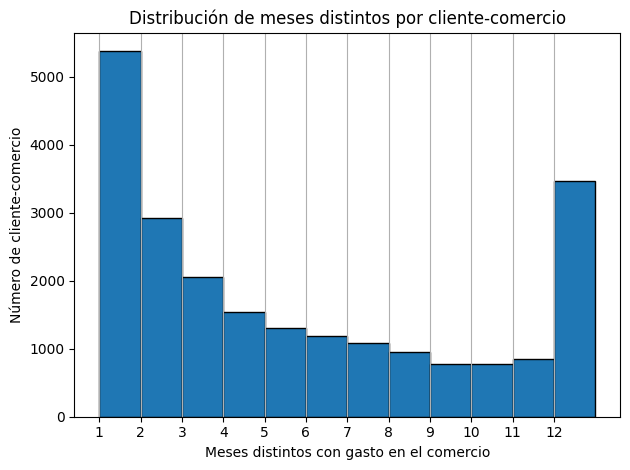

In [2]:
# Asegurarse que la fecha sea tipo datetime 
base_completa['fecha'] = pd.to_datetime(base_completa['fecha'])

# Crear columna año-mes
base_completa['año_mes'] = base_completa['fecha'].dt.to_period('M')

# Agrupar por cliente y comercio para contar meses distintos
frecuencia_mensual = (
    base_completa.groupby(['id', 'comercio'])['año_mes']
    .nunique()
    .reset_index(name='meses_distintos')
)

import matplotlib.pyplot as plt

# Histograma de meses distintos por cliente-comercio
frecuencia_mensual['meses_distintos'].hist(bins=12, edgecolor='black')
plt.xlabel("Meses distintos con gasto en el comercio")
plt.ylabel("Número de cliente-comercio")
plt.title("Distribución de meses distintos por cliente-comercio")
plt.xticks(range(1, 13))  # Meses del 1 al 12
plt.grid(axis='y')
plt.tight_layout()
plt.show()